In [1]:
"""
Boston housing dataset

Columns
-------
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

"""

"\nBoston housing dataset\n\nColumns\n-------\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's\n\n"

In [2]:
"""
Learnings
---------
Blindly dropping the NA rows is not good
What if that property is not of relevance?
We will still lose important data from other properties of the same observation
It is better to check first the number of NA rows % , datatypes



"""

'\nLearnings\n---------\nBlindly dropping the NA rows is not good\nWhat if that property is not of relevance?\nWe will still lose important data from other properties of the same observation\nIt is better to check first the number of NA rows % , datatypes\n\n\n\n'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots

In [4]:
HouseDf = pd.read_csv('HousingData.csv')
HouseDf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
HouseDf = HouseDf.rename(columns={
    'CRIM': 'crime_rate',
    'ZN': 'residential_large_lots',
    'INDUS': 'industrial_land',
    'CHAS': 'charles_river',
    'NOX': 'nox_concentration',
    'RM': 'avg_rooms',
    'AGE': 'built_before_1940',
    'DIS': 'distance_to_jobs',
    'RAD': 'highway_access',
    'TAX': 'property_tax',
    'PTRATIO': 'pupil_teacher_ratio',
    'B': 'black_population_index',
    'LSTAT': 'lower_status_population',
    'MEDV': 'median_home_value'
})
HouseDf.columns

Index(['crime_rate', 'residential_large_lots', 'industrial_land',
       'charles_river', 'nox_concentration', 'avg_rooms', 'built_before_1940',
       'distance_to_jobs', 'highway_access', 'property_tax',
       'pupil_teacher_ratio', 'black_population_index',
       'lower_status_population', 'median_home_value'],
      dtype='object')

In [6]:
HouseDf.describe()

,crime_rate,residential_large_lots,industrial_land,charles_river,nox_concentration,avg_rooms,built_before_1940,distance_to_jobs,highway_access,property_tax,pupil_teacher_ratio,black_population_index,lower_status_population,median_home_value
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
HouseDf.nunique()

crime_rate                 484
residential_large_lots      26
industrial_land             76
charles_river                2
nox_concentration           81
avg_rooms                  446
built_before_1940          348
distance_to_jobs           412
highway_access               9
property_tax                66
pupil_teacher_ratio         46
black_population_index     357
lower_status_population    438
median_home_value          229
dtype: int64

In [8]:
# number of rows that have atleast one NA
HouseDf.isna().any(axis=1).sum()

np.int64(112)

In [9]:
# percentage of rows with atleast one NA 
(112 / 486 ) * 100 

23.045267489711936

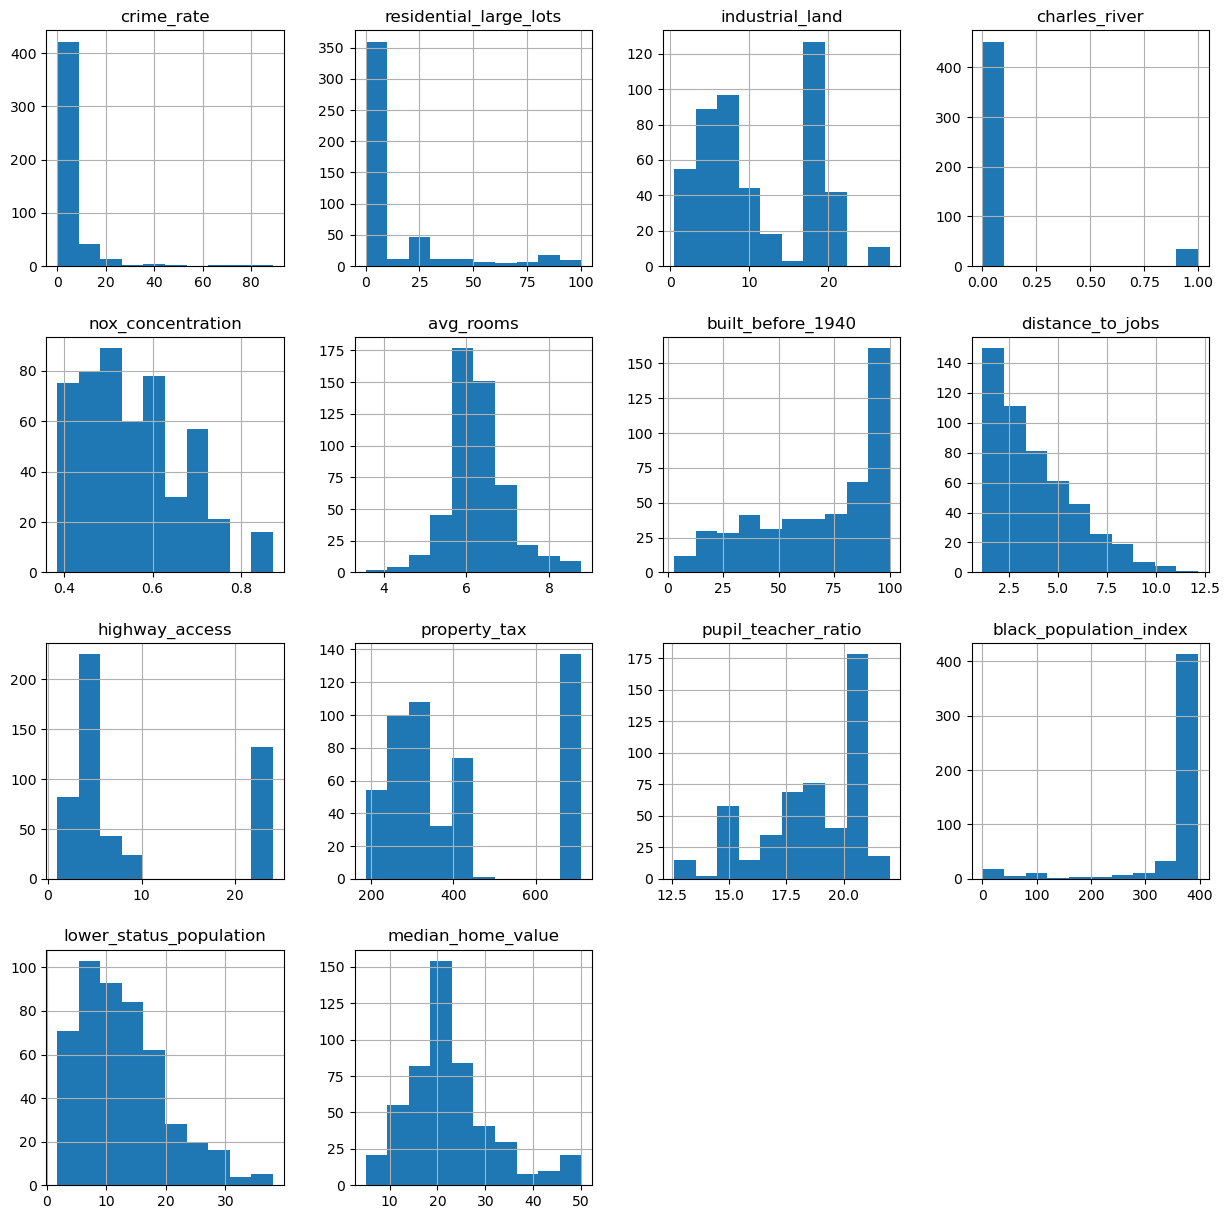

In [10]:
HouseDf.hist(figsize = (15,15));

In [11]:
# what a mess, with 14 variables
# sns.pairplot(HouseDf)

AttributeError: module 'matplotlib' has no attribute 'show'

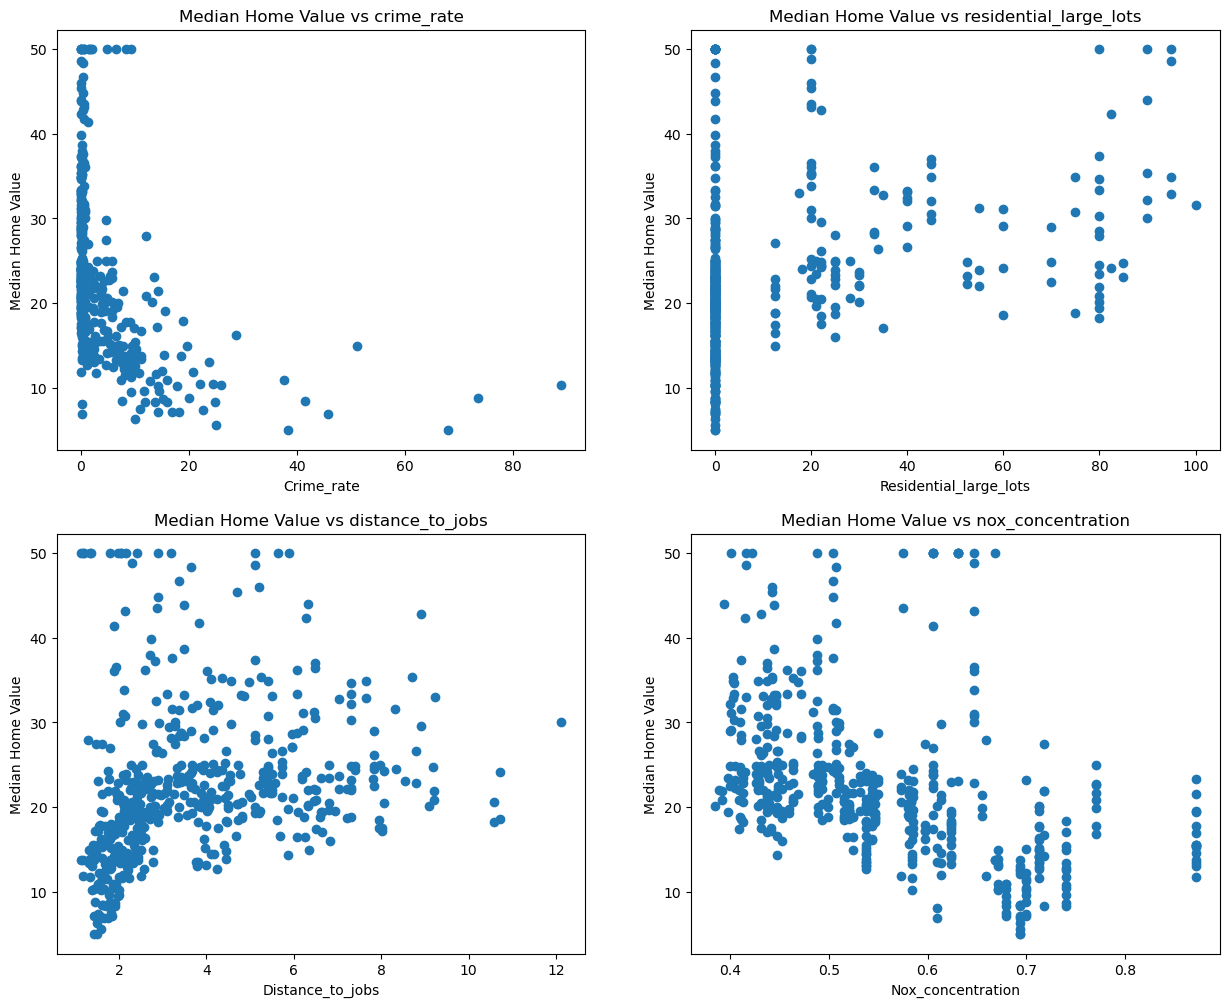

In [20]:
fig, axes = subplots(figsize = (15,12), nrows = 2, ncols = 2)
plots = [
    ('crime_rate', 'Median Home Value vs crime_rate'),
    ('residential_large_lots', 'Median Home Value vs residential_large_lots'),
    ('distance_to_jobs', 'Median Home Value vs distance_to_jobs'),
    ('nox_concentration', 'Median Home Value vs nox_concentration')
]

for ax, (col, title) in zip(axes.flat, plots):
    ax.scatter(HouseDf[col], HouseDf['median_home_value'])
    ax.set_ylabel('Median Home Value')
    ax.set_xlabel(col.capitalize())
    ax.set_title(title)

plt.show()

In [16]:
plt.figure(figsize=(10, 8))

numeric_df = HouseDf[['median_home_value','crime_rate','nox_concentration','black_population_index', 'lower_status_population',
                      'residential_large_lots','distance_to_jobs','highway_access','industrial_land', 
                      'property_tax', 'pupil_teacher_ratio','avg_rooms','built_before_1940','charles_river']]

sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1,
    vmax=1
)

plt.title('Correlation Heatmap')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
"""
from the correlation heatmap, following are what i think

charles_river has very less relation with other predictors, but has some effect on the home price
built_before_1940 has relation with almost all others
black population is not low status people
(bad bias)
built before 1940 are mostly industrial areas, where nox concentration is more. negative impact on price
avg rooms positive correlation with price
lower status people wont choose more no of avg rooms to stay
pupil teacher ratio and crime rates are in positive correlation. surprising. 
(pupil:teacher - so, high the correlation makes sense)
property tax is more near to properties near highway
highway access - no patterns
residential plots and working offices were built after 1940
(bad inference)
lower status people dont live near workplace. house prices are cheaper. more crime rates and high nox concentration

advices as stated by ChatGPT - 
Avoid behavioral language
Avoid identity-level conclusions
Stay within “X is correlated with Y”, not why

"""
cols = ['median_home_value','crime_rate','nox_concentration','black_population_index', 'lower_status_population',
        'residential_large_lots','distance_to_jobs','highway_access', 'industrial_land',
        'property_tax', 'pupil_teacher_ratio','avg_rooms','built_before_1940','charles_river']
HouseDf[cols].corr()

In [ ]:
fig, axes = subplots(figsize = (20,20), nrows = 3, ncols = 3)
plots = [
    ('pupil_teacher_ratio', 'crime_rate', 'pupil_teacher_ratio vs crime_rate'),
    ('built_before_1940', 'distance_to_jobs', 'built_before_1940 vs distance_to_jobs'),
    ('industrial_land', 'nox_concentration', 'industrial_land vs nox_concentration'),
    ('industrial_land', 'distance_to_jobs', 'industrial_land vs distance_to_jobs'),
    ('residential_large_lots', 'distance_to_jobs', 'residential_large_lots vs distance_to_jobs'),
    ('residential_large_lots', 'property_tax', 'residential_large_lots vs property_tax'),
    ('industrial_land', 'property_tax', 'industrial_land vs property_tax'),
    ('lower_status_population', 'residential_large_lots', 'lower_status_population vs residential_large_lots'),
    ('lower_status_population', 'industrial_land', 'lower_status_population vs industrial_land'),
]

for ax, (xAxis, yAxis, title) in zip(axes.flat, plots):
    ax.scatter(HouseDf[xAxis], HouseDf[yAxis])
    ax.set_xlabel(xAxis.capitalize())
    ax.set_ylabel(yAxis.capitalize())
    ax.set_title(title)

plt.show()

In [ ]:
"""
what i did so far
got the dataset, renamed columns for easy understanding. 
plotted correlation heatmap
identified correlations, made some assumptions
what next?
goal is to find different patterns. and see which are the factors affecting house price.
also regarding crime rate, population, effect of highway access etc


above was Stage 1: Global linear relationships

Stage 2: Univariate structure (distribution-level patterns)
a variable is key, if it satisfies atleast 1 of the below
It has high association with the target - correlation more than 50%
It has high variability / information content - if the range is less / many repeated values / narrow IQR , then there is less information in their raw numeric form.
It is structurally special / distribution irregularity (skewed, zero-inflated, capped, discrete) 
It is highly connected to many other variables - high correlation with other variables
It is a potential confounder or proxy - strong links to both target and predictors. 
"""

In [21]:
# Absolute correlation with target home value
corr_target = HouseDf.corr()['median_home_value'].abs()
# Variables strongly associated with target
high_assoc = corr_target[corr_target >= 0.5]
print(high_assoc,'\n')

# Absolute correlation with target crime rate
corr_target = HouseDf.corr()['crime_rate'].abs()
# Variables strongly associated with target
high_assoc = corr_target[corr_target >= 0.5]
print(high_assoc)

avg_rooms                  0.695360
pupil_teacher_ratio        0.507787
lower_status_population    0.735822
median_home_value          1.000000
Name: median_home_value, dtype: float64 

crime_rate        1.000000
highway_access    0.624765
property_tax      0.580595
Name: crime_rate, dtype: float64


In [ ]:
"""
top predictors - lower_status_population & highway_access
"""

In [ ]:
# Summary statistics
desc = HouseDf.describe().T

# Range and IQR
desc['range'] = desc['max'] - desc['min']
desc['IQR'] = desc['75%'] - desc['25%']

# Relative IQR (small → low information)
desc['IQR_ratio'] = desc['IQR'] / desc['range']

# Proportion of unique values (small → many repeats)
desc['unique_ratio'] = HouseDf.nunique() / len(HouseDf)

desc[['range', 'IQR', 'IQR_ratio', 'unique_ratio']]

In [ ]:
"""
charles_river - red flag. very low variance. 75% of data points are of same value
residential_large_lots, avg_rooms, black_population_index - very less IQR ratio. high range, but low IQR suggests most data is concentrated near the ends. maybe as outliers
highway_access, property_tax - high IQR ratio, less unique_ratio - ordinal or grouped. middle 50% covers almost entire range 
"""

In [ ]:
# Skewness (large magnitude → skewed distribution)
HouseDf.skew().sort_values(ascending=False)

In [ ]:
"""
a skewness value greater than 1 (or less than -1) is considered highly skewed
crime_rate & residential_large_lots - most neighbourhoods have low crime rates. large residential lots are mostly of same area. but some outliers.
black_population_index - most neighbourhoods have large black population
pupil_teacher_ratio - most schools have higher pupils, lesser teachers
avg_rooms & industrial_land - relatively symmetric

perform log transformations on the variables with skewness > 1
"""

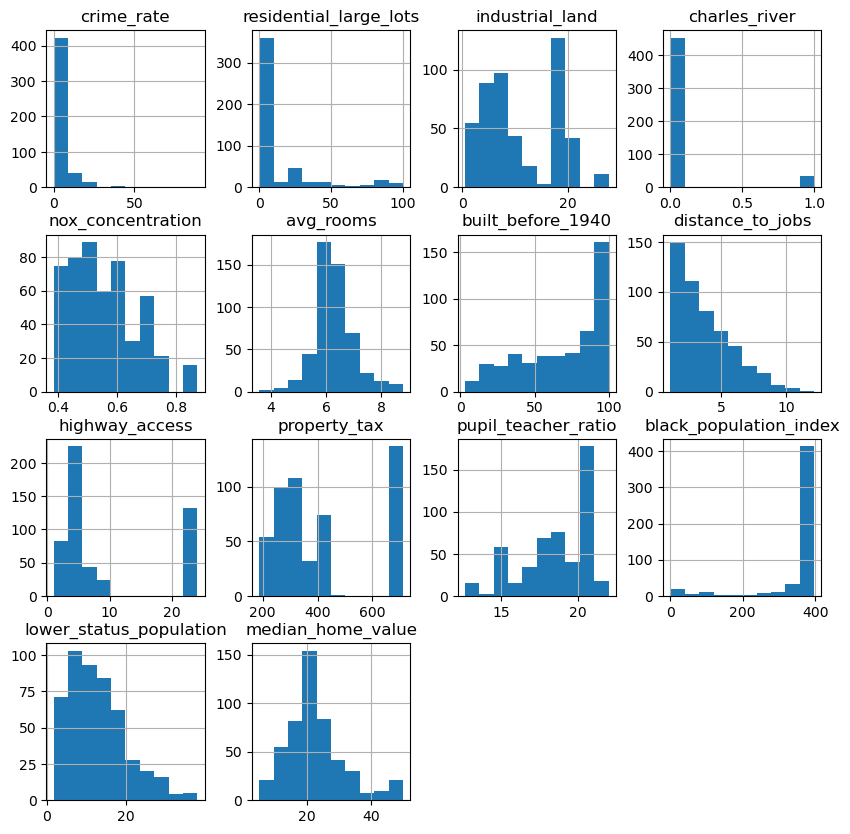

In [22]:
HouseDf.hist(figsize=(10,10));

In [ ]:
# Zero-inflation check (high proportion of zeros)
zero_ratio = (HouseDf == 0).sum() / len(HouseDf)
zero_ratio.sort_values(ascending=False)

In [ ]:
"""
binary traps - charles_river - most of them are zero
residential_large_lots - many of towns dont have residential lots greater than 25000 sq ft
"""

In [ ]:
# Discrete / capped behavior (few unique values)
print(HouseDf.nunique().sort_values())
print('number of rows -',len(HouseDf))

In [ ]:
HouseDf['highway_access'].unique()
# highway_access and charles_river can be made categorical
# but charles_river can be ignored altogether given its insignificance i guess. 
# it has 0.18 correlation with house price. but very less with crime rate

In [ ]:
# Variables correlated with target
target_related = corr_target[corr_target >= 0.3].index
# Correlations among those variables
HouseDf[target_related].corr()
# Flag strong predictor–predictor correlations (proxy candidates)
HouseDf[target_related].corr().abs() >= 0.6

In [ ]:
"""
web of high correlation between industrial_land, nox_concentration, built_before_1940, and distance_to_jobs
if we include all these in the regression, chanes of VIF is more
"""

In [ ]:
"""
step3 - target centered exploration
"""

In [23]:
import seaborn as sns

for col in cols:
    if col != 'median_home_value':
        sns.scatterplot(x=HouseDf[col], y=HouseDf['median_home_value'])
        plt.show()


NameError: name 'cols' is not defined

In [ ]:
"""
Reveals:
Non-linear shapes
Saturation effects
Threshold behavior
Heteroscedasticity 
"""

In [ ]:
"""
step 4 (not clear): Conditional patterns

This is where real patterns emerge
Separates:
Direct association
Proxy effects
Confounding

sns.scatterplot(
    x='crime_rate',
    y='median_home_value',
    hue='highway_access',
    data=HouseDf
)

HouseDf['crime_bin'] = pd.qcut(HouseDf['crime_rate'], 4)
HouseDf.groupby('crime_bin')['median_home_value'].mean()

"""

In [ ]:
"""
step 5 : Multicollinearity diagnosis
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = HouseDf.drop(columns=['median_home_value'])
X_clean = X.replace([np.inf, -np.inf], np.nan).dropna()
vif = pd.DataFrame({
    'feature': X_clean.columns,
    'VIF': [variance_inflation_factor(X_clean.values, i) for i in range(X_clean.shape[1])]
})
vif

In [ ]:
"""
< 5 → low multicollinearity
5–10 → moderate
> 10 → severe (proxy/confounder behavior)

The "Heavy Hitters" (>50): nox_concentration, avg_rooms, property_tax, and pupil_teacher_ratio. These are highly redundant.
The "Structural" Cluster: industrial_land, built_before_1940, and distance_to_jobs are all in the 14–22 range. This confirms they are fighting over the same "urban density" explanation.

High VIF ≠ bad variable
High VIF = “do not interpret this coefficient alone.”

Keep all variables, but:
Use regression only to see which effects survive
Ignore magnitude, focus on sign + stability
OR
Pick one variable per proxy group, drop the rest

"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = HouseDf.drop(columns=['median_home_value','pupil_teacher_ratio'])
X_clean = X.replace([np.inf, -np.inf], np.nan).dropna()
vif = pd.DataFrame({
    'feature': X_clean.columns,
    'VIF': [variance_inflation_factor(X_clean.values, i) for i in range(X_clean.shape[1])]
})
vif

In [ ]:
"""
after dropping the pupil_teacher_ratio, the VIF reduced for avg rooms
it also makes sense to drop pupil_teacher_ratio when trying to predict house price
"""

In [ ]:
"""
step 6 : fit a dummy model with all variables to see the coefficients and the signs
"""

In [ ]:
# Separate X and y first
X = HouseDf.drop(columns=['median_home_value'])
y = HouseDf['median_home_value']

# Clean X
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

# Align y to X's index
y = y.loc[X.index]

# Add intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()
model.summary()


In [ ]:
"""
Now back to assignments
"""

In [45]:
#HouseDf[HouseDf['charles_river'] == 1].count()
HouseDf[HouseDf['charles_river'] == 1].shape[0]

34

In [30]:
HouseDf['pupil_teacher_ratio'].median()

19.05

In [46]:
HouseDf[HouseDf['median_home_value'] == 5.000000]

,crime_rate,residential_large_lots,industrial_land,charles_river,nox_concentration,avg_rooms,built_before_1940,distance_to_jobs,highway_access,property_tax,pupil_teacher_ratio,black_population_index,lower_status_population,median_home_value
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


In [48]:
# to compare the predictors of lowest home median value with overall range
HouseDf.describe()

,crime_rate,residential_large_lots,industrial_land,charles_river,nox_concentration,avg_rooms,built_before_1940,distance_to_jobs,highway_access,property_tax,pupil_teacher_ratio,black_population_index,lower_status_population,median_home_value
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [52]:
HouseDf[HouseDf['avg_rooms'] > 7].shape[0]

64

In [54]:
HouseDf[HouseDf['avg_rooms'] > 8]

,crime_rate,residential_large_lots,industrial_land,charles_river,nox_concentration,avg_rooms,built_before_1940,distance_to_jobs,highway_access,property_tax,pupil_teacher_ratio,black_population_index,lower_status_population,median_home_value
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
163,1.51902,0.0,19.58,1.0,0.6050,8.375,NaN,2.1620,5,403,14.7,388.45,3.32,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
224,0.31533,0.0,6.20,0.0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
226,0.38214,0.0,6.20,0.0,0.5040,8.040,86.5,3.2157,8,307,17.4,387.38,NaN,37.6
232,0.57529,0.0,6.20,0.0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7
233,0.33147,0.0,6.20,0.0,0.5070,8.247,NaN,3.6519,8,307,17.4,378.95,3.95,48.3
253,0.36894,22.0,5.86,0.0,0.4310,8.259,8.4,8.9067,7,330,19.1,396.90,3.54,42.8
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
